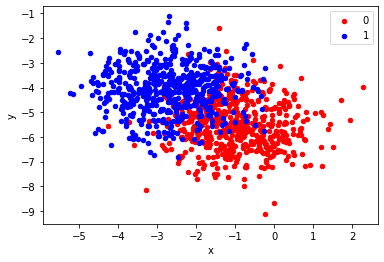

In [40]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X_train1, y_train1 = make_blobs(n_samples=1100, centers=2, n_features=2, shuffle=True, random_state=300)
# scatter plot, dots colored by class value
train1 = DataFrame(dict(x=X_train1[:,0], y=X_train1[:,1], label=y_train1))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = train1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [41]:
print("Number of samples in X_train : {}" .format(len(X_train1)))
print("Number of samples in y_train : {}" .format(len(y_train1)))

Number of samples in X_train : 1100
Number of samples in y_train : 1100


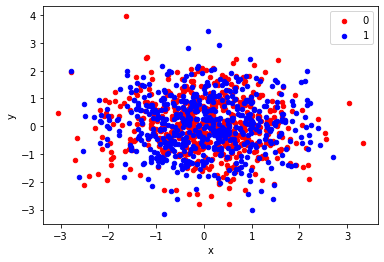

In [42]:
X_test2, y_test2 = make_blobs(n_samples=1100, centers=2, n_features=2, shuffle=True, center_box=(0,0), random_state=1)
# scatter plot, dots colored by class value
test2 = DataFrame(dict(x=X_test2[:,0], y=X_test2[:,1], label=y_test2))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = test2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [43]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Finding Best K value and displaying training and test classification accuracy values in a plot
k_range = range(1, 35, 2)

# Testing and Testing accuracy
testing_accuracy_scores=[]
training_accuracy_scores=[]

best_k = 0
max_val = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    
    y_training_pred = knn.predict(X_train1)
    train_score = metrics.accuracy_score(y_train1, y_training_pred)
    training_accuracy_scores.append(train_score)

    y_test_pred = knn.predict(X_test2)
    test_score = metrics.accuracy_score(y_test2, y_test_pred)
    testing_accuracy_scores.append(test_score)
    
    if test_score > max_val:
        max_val = test_score;
        best_k = k;

KNN Train Test Accuracy with respect to K


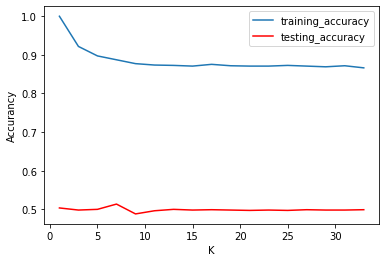

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

print("KNN Train Test Accuracy with respect to K")

plt.plot(k_range, training_accuracy_scores, label = "training_accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label = "testing_accuracy")
plt.xlabel("K")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [45]:
print("Best K = ", best_k)

Best K =  7


In [46]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train1, y_train1)

y_train_pred = knn_model.predict(X_train1)
print("Training accuracy for best K = ", metrics.accuracy_score(y_train1, y_train_pred))

Training accuracy for best K =  0.8872727272727273


In [47]:
y_test_pred = knn_model.predict(X_test2)
testAccuracy = metrics.accuracy_score(y_test2, y_test_pred)
print("Test accuracy for best K = ", testAccuracy)

Test accuracy for best K =  0.5136363636363637


# COMMENT

As the training data, I created a linear and not too much noise data. For the second date set, I created a nested data, which is very different from the test data of the first data set, thus increasing the noise. Training and test data has 1100 pieces of data. As can be seen from the graph here, the best K value is 7. In the graph, there is an underfit situation for values less than 7. Here the bias is low while the variance is high. Values higher than 7 are not too bad. Values greater than 7 have a higher bias than values less than 7, but a lower variance. In this example, since the test data is very unevenly distributed, the accuracy value is not much affected by the K value. As the number of data increases, the best k value decreases. Training accuracy and test accuracy are almost unchanged.

In [48]:
train1.describe()

,x,y,label
count,1100.000000,1100.000000,1100.000000
mean,-1.850827,-4.808851,0.500000
std,1.295684,1.230416,0.500227
min,-5.543785,-9.121395,0.000000
25%,-2.769802,-5.752556,0.000000
50%,-1.835583,-4.778987,0.500000
75%,-0.955043,-3.918791,1.000000
max,2.266762,-1.113194,1.000000


In [49]:
test2.describe()

,x,y,label
count,1100.000000,1100.000000,1100.000000
mean,0.029434,0.025254,0.500000
std,1.005928,0.994368,0.500227
min,-3.053764,-3.153357,0.000000
25%,-0.633044,-0.630425,0.000000
50%,0.034505,0.024679,0.500000
75%,0.681890,0.722352,1.000000
max,3.321079,3.958603,1.000000


In [50]:
X_train1_desc = train1.x.describe()
X_train1_desc

count    1100.000000
mean       -1.850827
std         1.295684
min        -5.543785
25%        -2.769802
50%        -1.835583
75%        -0.955043
max         2.266762
Name: x, dtype: float64

In [51]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler().fit(X_train1)

X_train1_scaled = scaler.transform(X_train1)
X_train1_scaled

array([[ 0.20124992,  1.274339  ],
       [-0.77630549,  0.52045789],
       [-0.30989301, -0.0045235 ],
       ...,
       [ 0.80316071, -0.39248866],
       [-0.54399796,  0.402876  ],
       [ 0.58568422, -0.44893319]])

In [52]:
X_test2_scaled = scaler.transform(X_test2)
X_test2_scaled

array([[1.09464045, 2.91680656],
       [0.59762866, 2.41035211],
       [0.7741537 , 2.2800185 ],
       ...,
       [0.77846483, 2.65325763],
       [0.7772932 , 3.39774468],
       [1.34562621, 3.85693034]])

In [53]:
# Finding Best K value and displaying training and test classification accuracy values in a plot
testing_accuracy_scores=[]
training_accuracy_scores=[]

best_k = 0
max_val = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1_scaled, y_train1)
    
    y_training_pred = knn.predict(X_train1_scaled)
    train_score = metrics.accuracy_score(y_train1, y_training_pred)
    training_accuracy_scores.append(train_score)

    y_test_pred = knn.predict(X_test2_scaled)
    test_score = metrics.accuracy_score(y_test2, y_test_pred)
    testing_accuracy_scores.append(test_score)
    
    if test_score > max_val:
        max_val = test_score;
        best_k = k;

KNN Train Test Accuracy with respect to K on scaled data


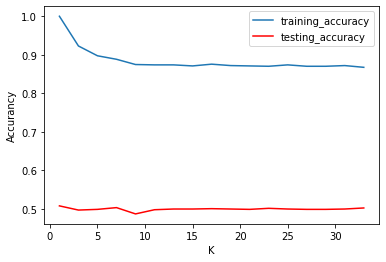

In [54]:
print("KNN Train Test Accuracy with respect to K on scaled data")

plt.plot(k_range, training_accuracy_scores, label = "training_accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label = "testing_accuracy")
plt.xlabel("K")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [55]:
print("Best K on scaled data = ", best_k)

Best K on scaled data =  1


In [56]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train1_scaled, y_train1)

y_train_pred = knn_model.predict(X_train1_scaled)
print("Training accuracy for best K on scaled data = ", metrics.accuracy_score(y_train1, y_train_pred))

Training accuracy for best K on scaled data =  1.0


In [57]:
y_test_pred = knn_model.predict(X_test2_scaled)
testScaledAccuracy = metrics.accuracy_score(y_test2, y_test_pred);
print("Test accuracy for best K on scaled data = ", testScaledAccuracy)

Test accuracy for best K on scaled data =  0.5072727272727273


In [58]:
print("Test accuracy for best K on original (unscaled data) = ", testAccuracy)

increaseInAccuracy = 100 * (testScaledAccuracy - testAccuracy)
print("Increase due to scaling on test accuracy  = ",round(increaseInAccuracy, 2), "%")

Test accuracy for best K on original (unscaled data) =  0.5136363636363637
Increase due to scaling on test accuracy  =  -0.64 %
